In [1]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/dataExtraction.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [2]:
path = '/content/Data Extraction'

In [9]:
!mkdir '/content/Data Extraction/Train Images'
!mkdir '/content/Data Extraction/Masked Train Images'


mkdir: cannot create directory ‘/content/Data Extraction/Train Images’: File exists


In [4]:
!pip install opencv-python
!pip install matplotlib

In [13]:
# CONVERTING PDF TO IMAGE
!pip install pdf2image
!apt-get install poppler-utils

import os
from pdf2image import convert_from_path

BASE_PDF_DIR = path + '/Train Files'
BASE_IMG_DIR = path + '/Train Images'
pdfs = os.listdir( path + "/Train Files")

for pdf in pdfs:
  print(f'{BASE_PDF_DIR}/{pdf}')
  images = convert_from_path(f'{BASE_PDF_DIR}/{pdf}')

  for i in range(len(images)):
    images[i].save(BASE_IMG_DIR + '/' + pdf.rsplit('.')[0] +'.jpg', 'JPEG')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.3 [186 kB]
Fetched 186 kB in 1s (362 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 120882 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.3_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.3) ...
Setting up poppler-utils (22.02.0-2ubuntu0.3) ...
Processing triggers for man-db (2.10.2-1) ...
/content/Data Extraction/Train Files/1040_file_89.pdf
/content/Data Extraction/Train Files/1040_file_93.pdf
/content/Data Extraction/Train Files/1040_file_9.pdf
/content/Data Extraction/Tra

In [14]:
import numpy as np

import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

path = '/content/Data Extraction'
BASE_IMG_DIR = path + '/Masked Train Images'


def mask(image_name):
  # Define the dimensions of the center rectangle
  image_path = path +"/Train Images/" +image_name
  image = cv2.imread(image_path)

  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  height, width= gray_image.shape

  rect_width = int(width * 0.8)
  rect_height = int(height * 0.5)

  # Calculate the coordinates of the top-left and bottom-right corners of the rectangle
  x1 = int(width* 0.02)
  y1 = int(height* 0.25)
  x2 = int(width * 0.8)
  y2 = height

  # Create a mask with the same size as the image
  mask = np.zeros_like(gray_image)

  # Draw a white rectangle on the mask
  cv2.rectangle(mask, (x1, y1), (x2, y2), (255, 255, 255), thickness=cv2.FILLED)
  inverted_mask = cv2.bitwise_not(mask)

  # Apply the inverted mask to the original image
  masked_img = cv2.bitwise_and(gray_image, inverted_mask)
  mask_folder = os.path.join(path, "Masked Train Images")
  os.makedirs(mask_folder, exist_ok=True)  # Create the "mask" folder if it doesn't exist
  masked_image_path = os.path.join(mask_folder, image_name)

  cv2.imwrite(masked_image_path, masked_img)


In [16]:
import os
for item in os.listdir(path + "/Train Images"):
  mask(item)

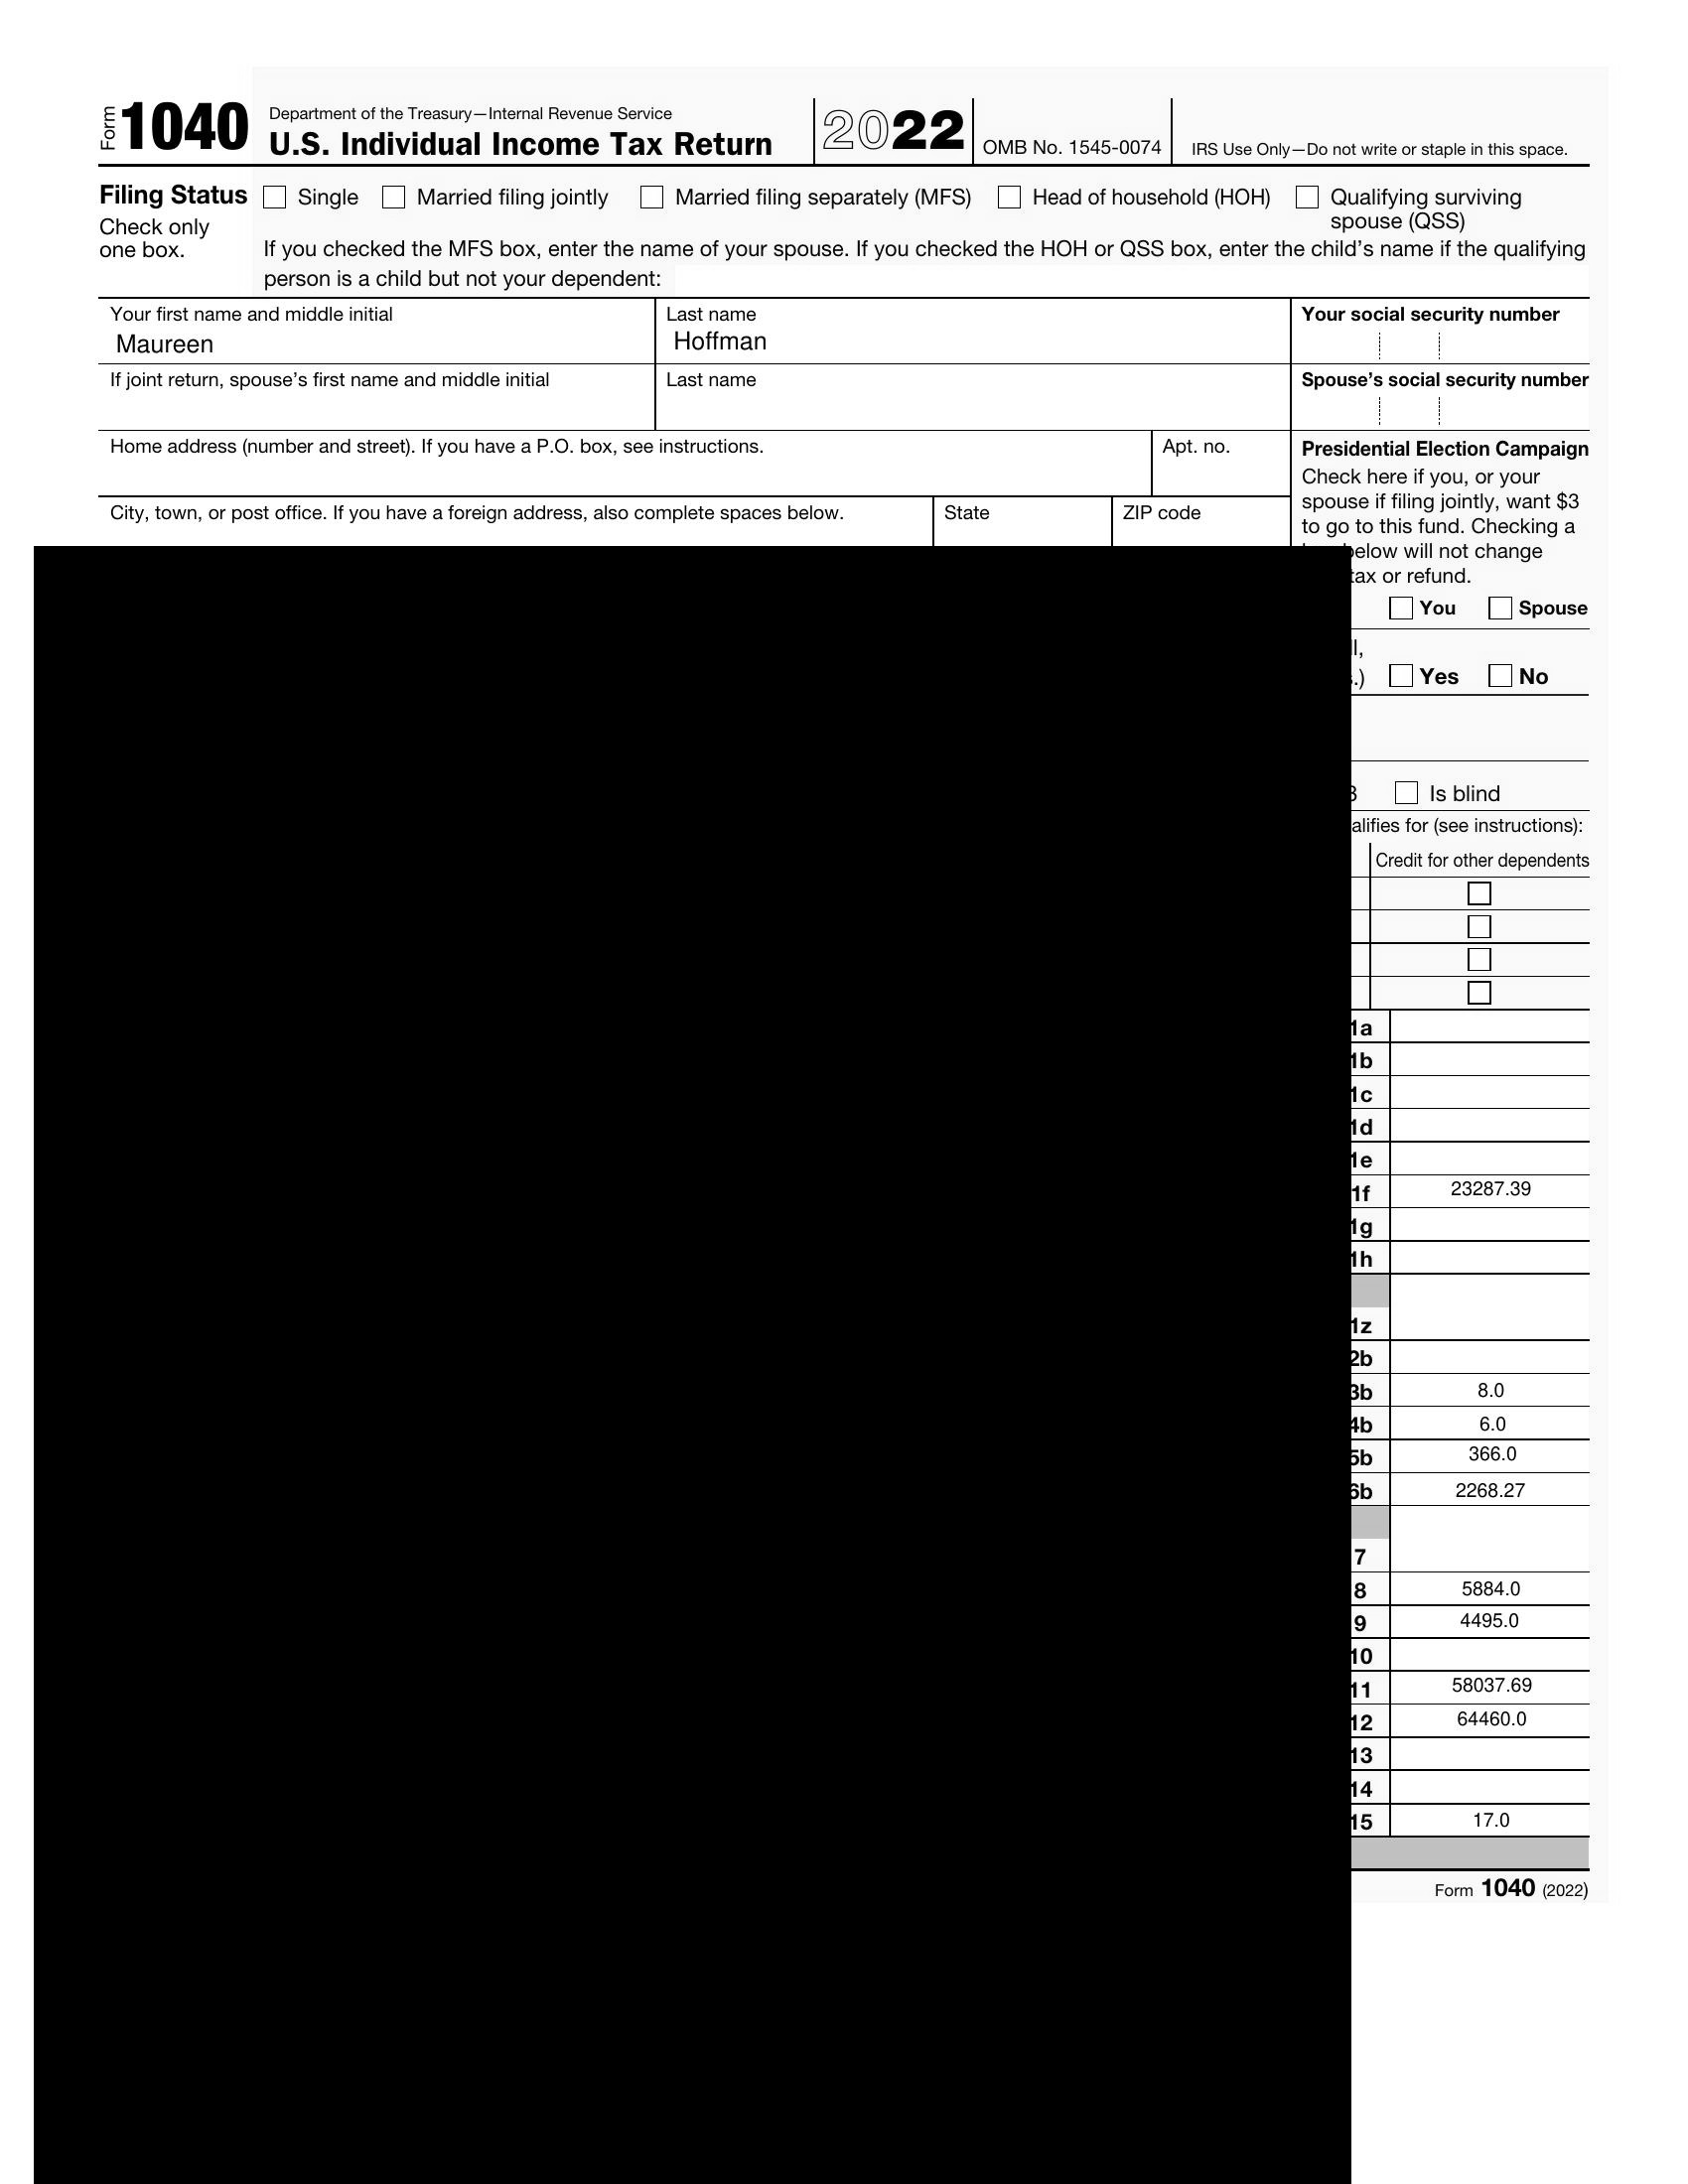

In [19]:
# INSPECTION
image = cv2.imread("/content/Data Extraction/Masked Train Images/1040_file_1.jpg")
cv2_imshow(image)

In [ ]:
path = '/content/Data Extraction'
BASE_IMG_DIR = path + '/Masked Train Images'


def mask_two(image_name):
  # Define the dimensions of the center rectangle
  image_path = path +"/Train Images/" +image_name
  image = cv2.imread(image_path)

  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

  # Define the coordinates of the rectangle to be masked
  x, y, width, height = 100, 50, 200, 150

  # Create a mask of the same size as the image
  mask = np.zeros_like(gray_image)
  x, y, width, height = 30, 300, 1200, 70

  # Draw a filled white rectangle on the mask
  cv2.rectangle(mask, (x, y), (x + width, y + height), (255, 255, 255), thickness=cv2.FILLED)


  x, y, width, height = 1330, 1000, 300, 1000

  # Draw a filled white rectangle on the mask
  cv2.rectangle(mask, (x, y), (x + width, y + height), (255, 255, 255), thickness=cv2.FILLED)
  # Bitwise AND operation to apply the mask to the image
  masked_img = cv2.bitwise_and(gray_image, mask)
  cv2_imshow(masked_img)



  # mask_folder = os.path.join(path, "Masked Train Images")
  # os.makedirs(mask_folder, exist_ok=True)  # Create the "mask" folder if it doesn't exist
  # masked_image_path = os.path.join(mask_folder, image_name)

  # cv2.imwrite(masked_image_path, masked_img)


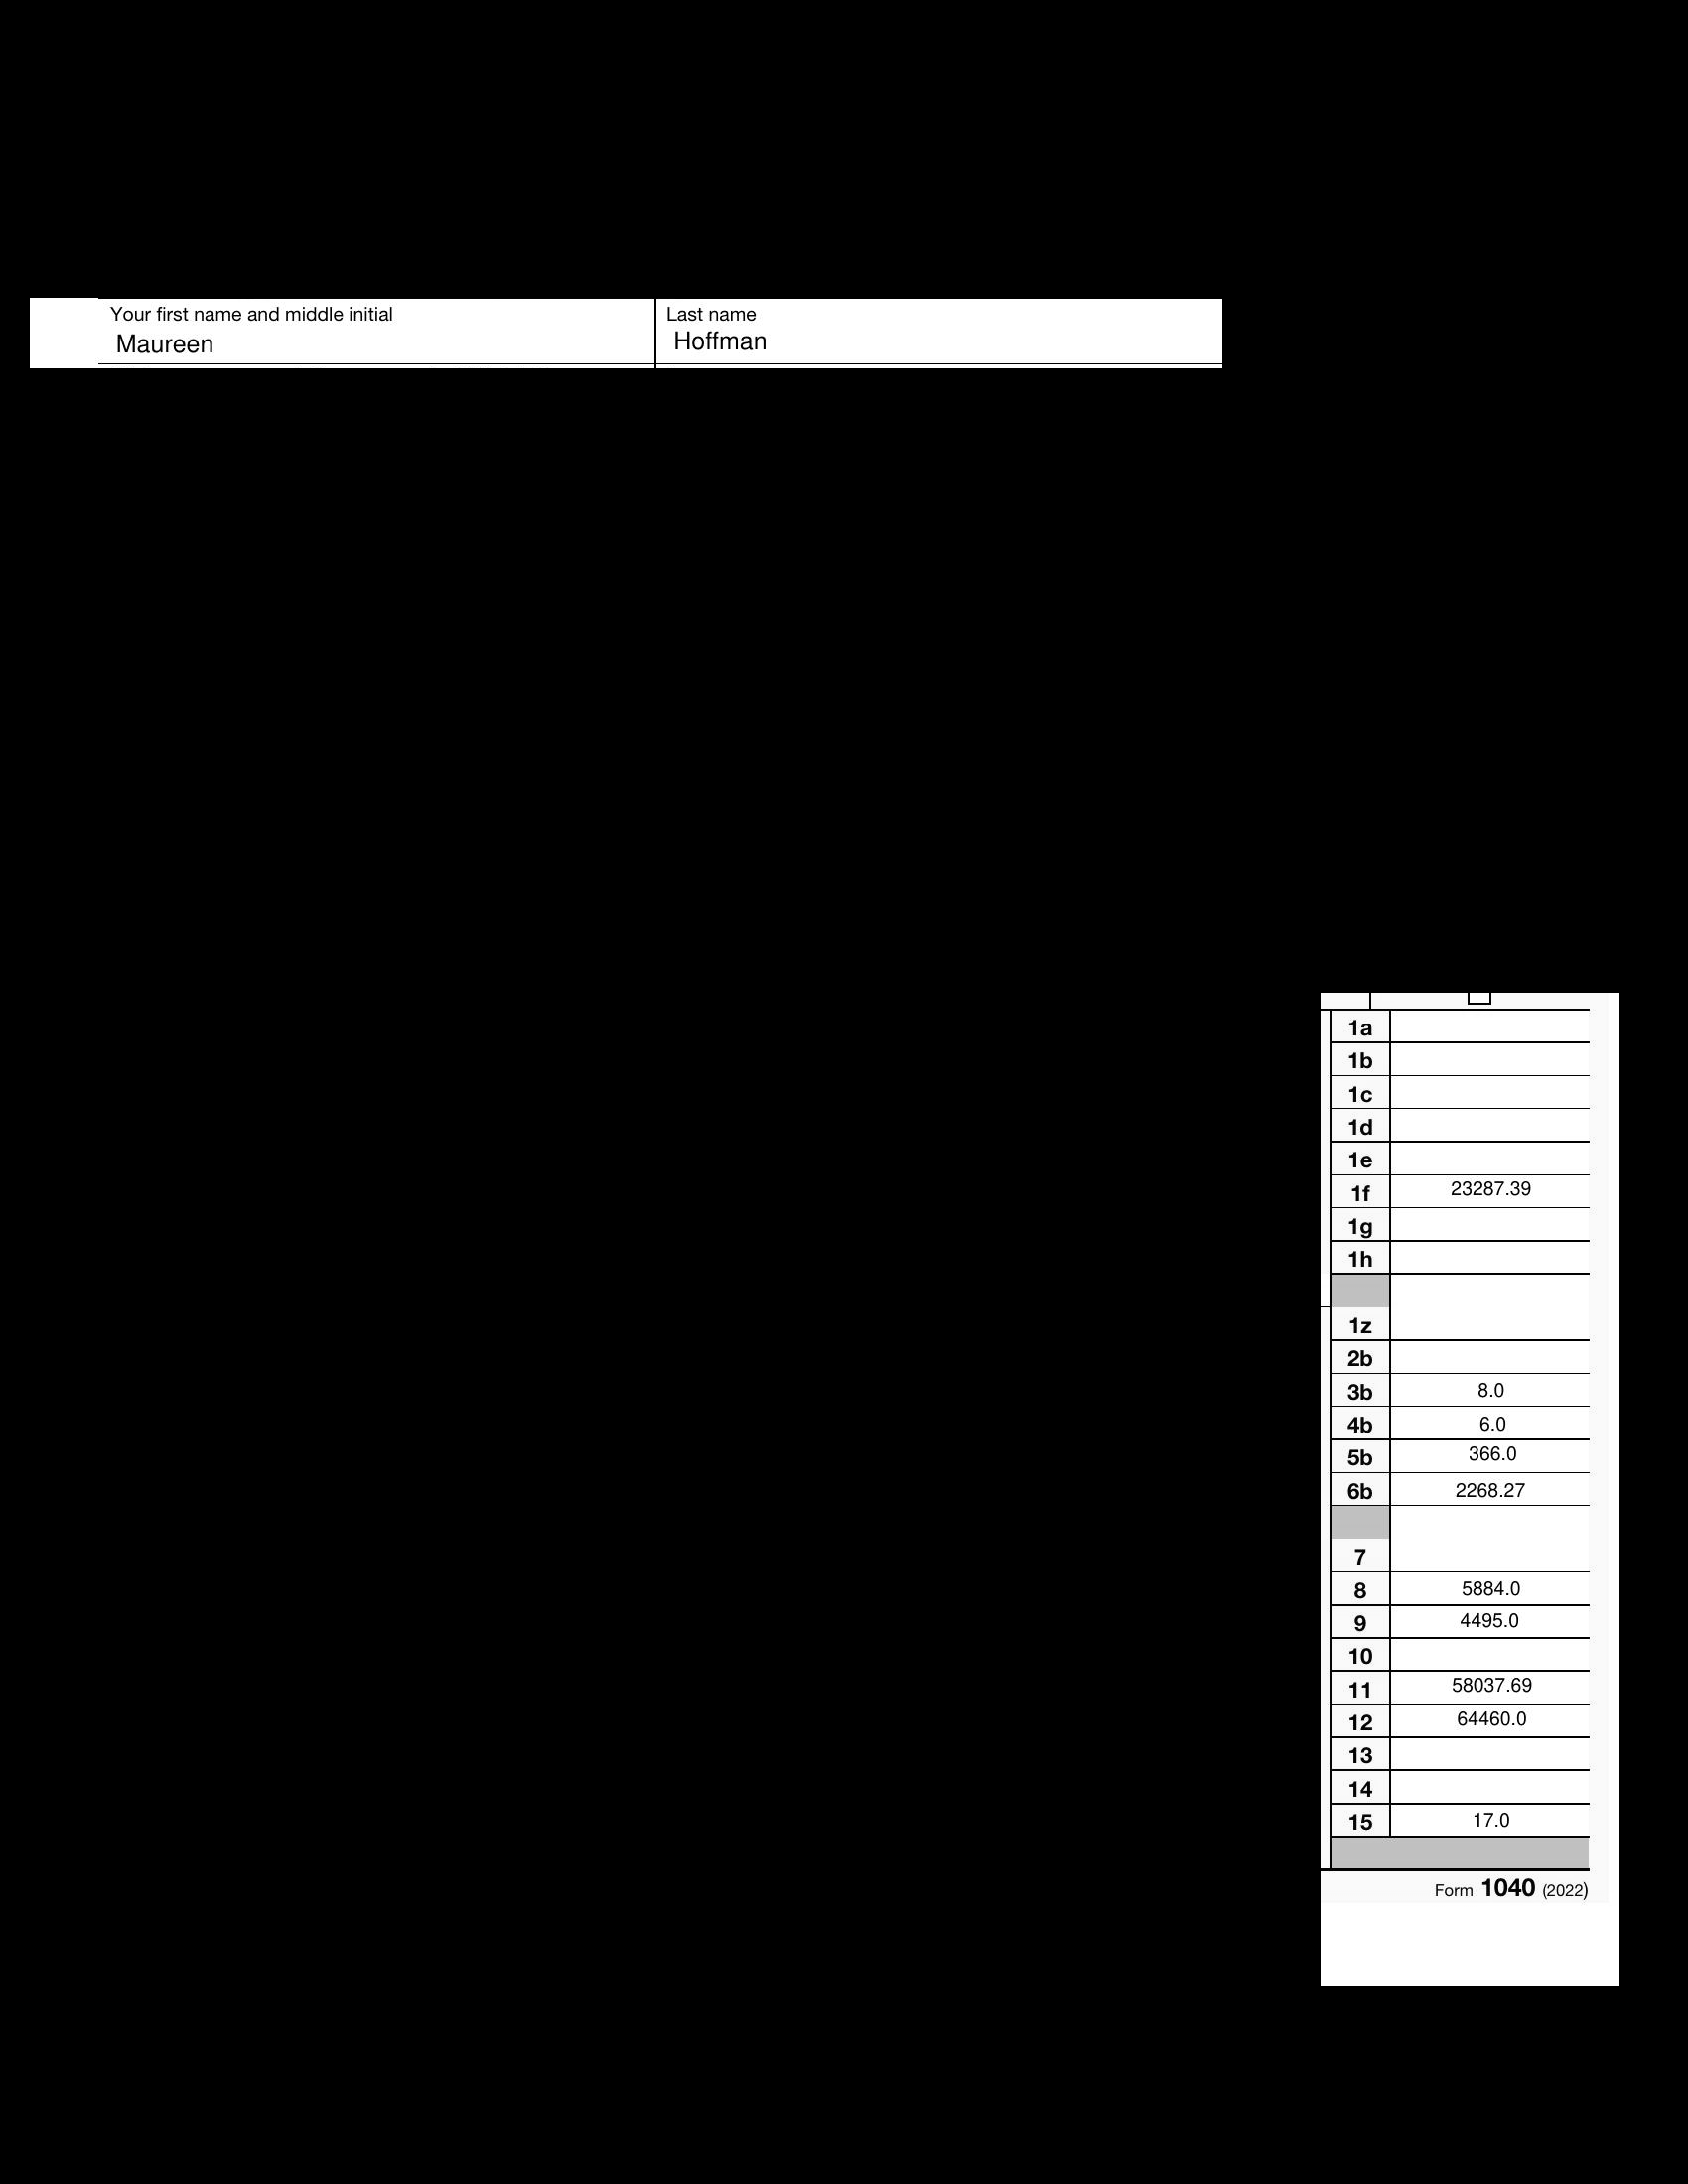

In [ ]:
mask_two("1040_file_1.jpg")